In [1]:
### importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from itertools import product
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
### loding the data
voice_df = pd.read_csv(r"voice.csv")
print(voice_df)
print("size of Gender Recognition dataset :{}".format(voice_df.shape))

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroi

In [3]:
### discription of data
voice_df.info()
voice_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [4]:
### checking the null values
voice_df.isna().sum()       #printing a count of missing value w.r.t each feature in full_df

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

male      1584
female    1584
Name: label, dtype: int64

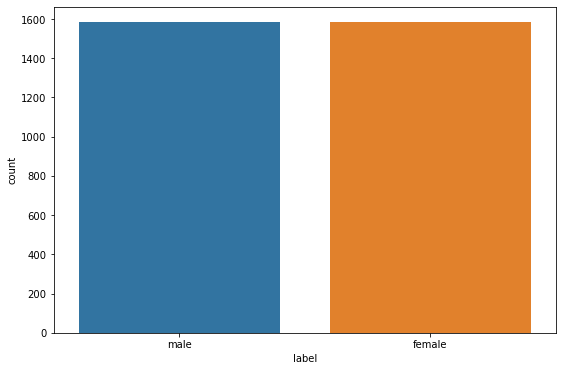

In [5]:
### analysis of target variable
plt.figure(figsize=(9,6))
sns.countplot(x='label',data=voice_df,order=["male","female"])
voice_df['label'].value_counts()    #prints the count of different classes in'label'

In [6]:
### processing Categorical values:
label_encode = LabelEncoder()  #creating instance of labelencoder
voice_df['label']=label_encode.fit_transform(voice_df['label'])
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


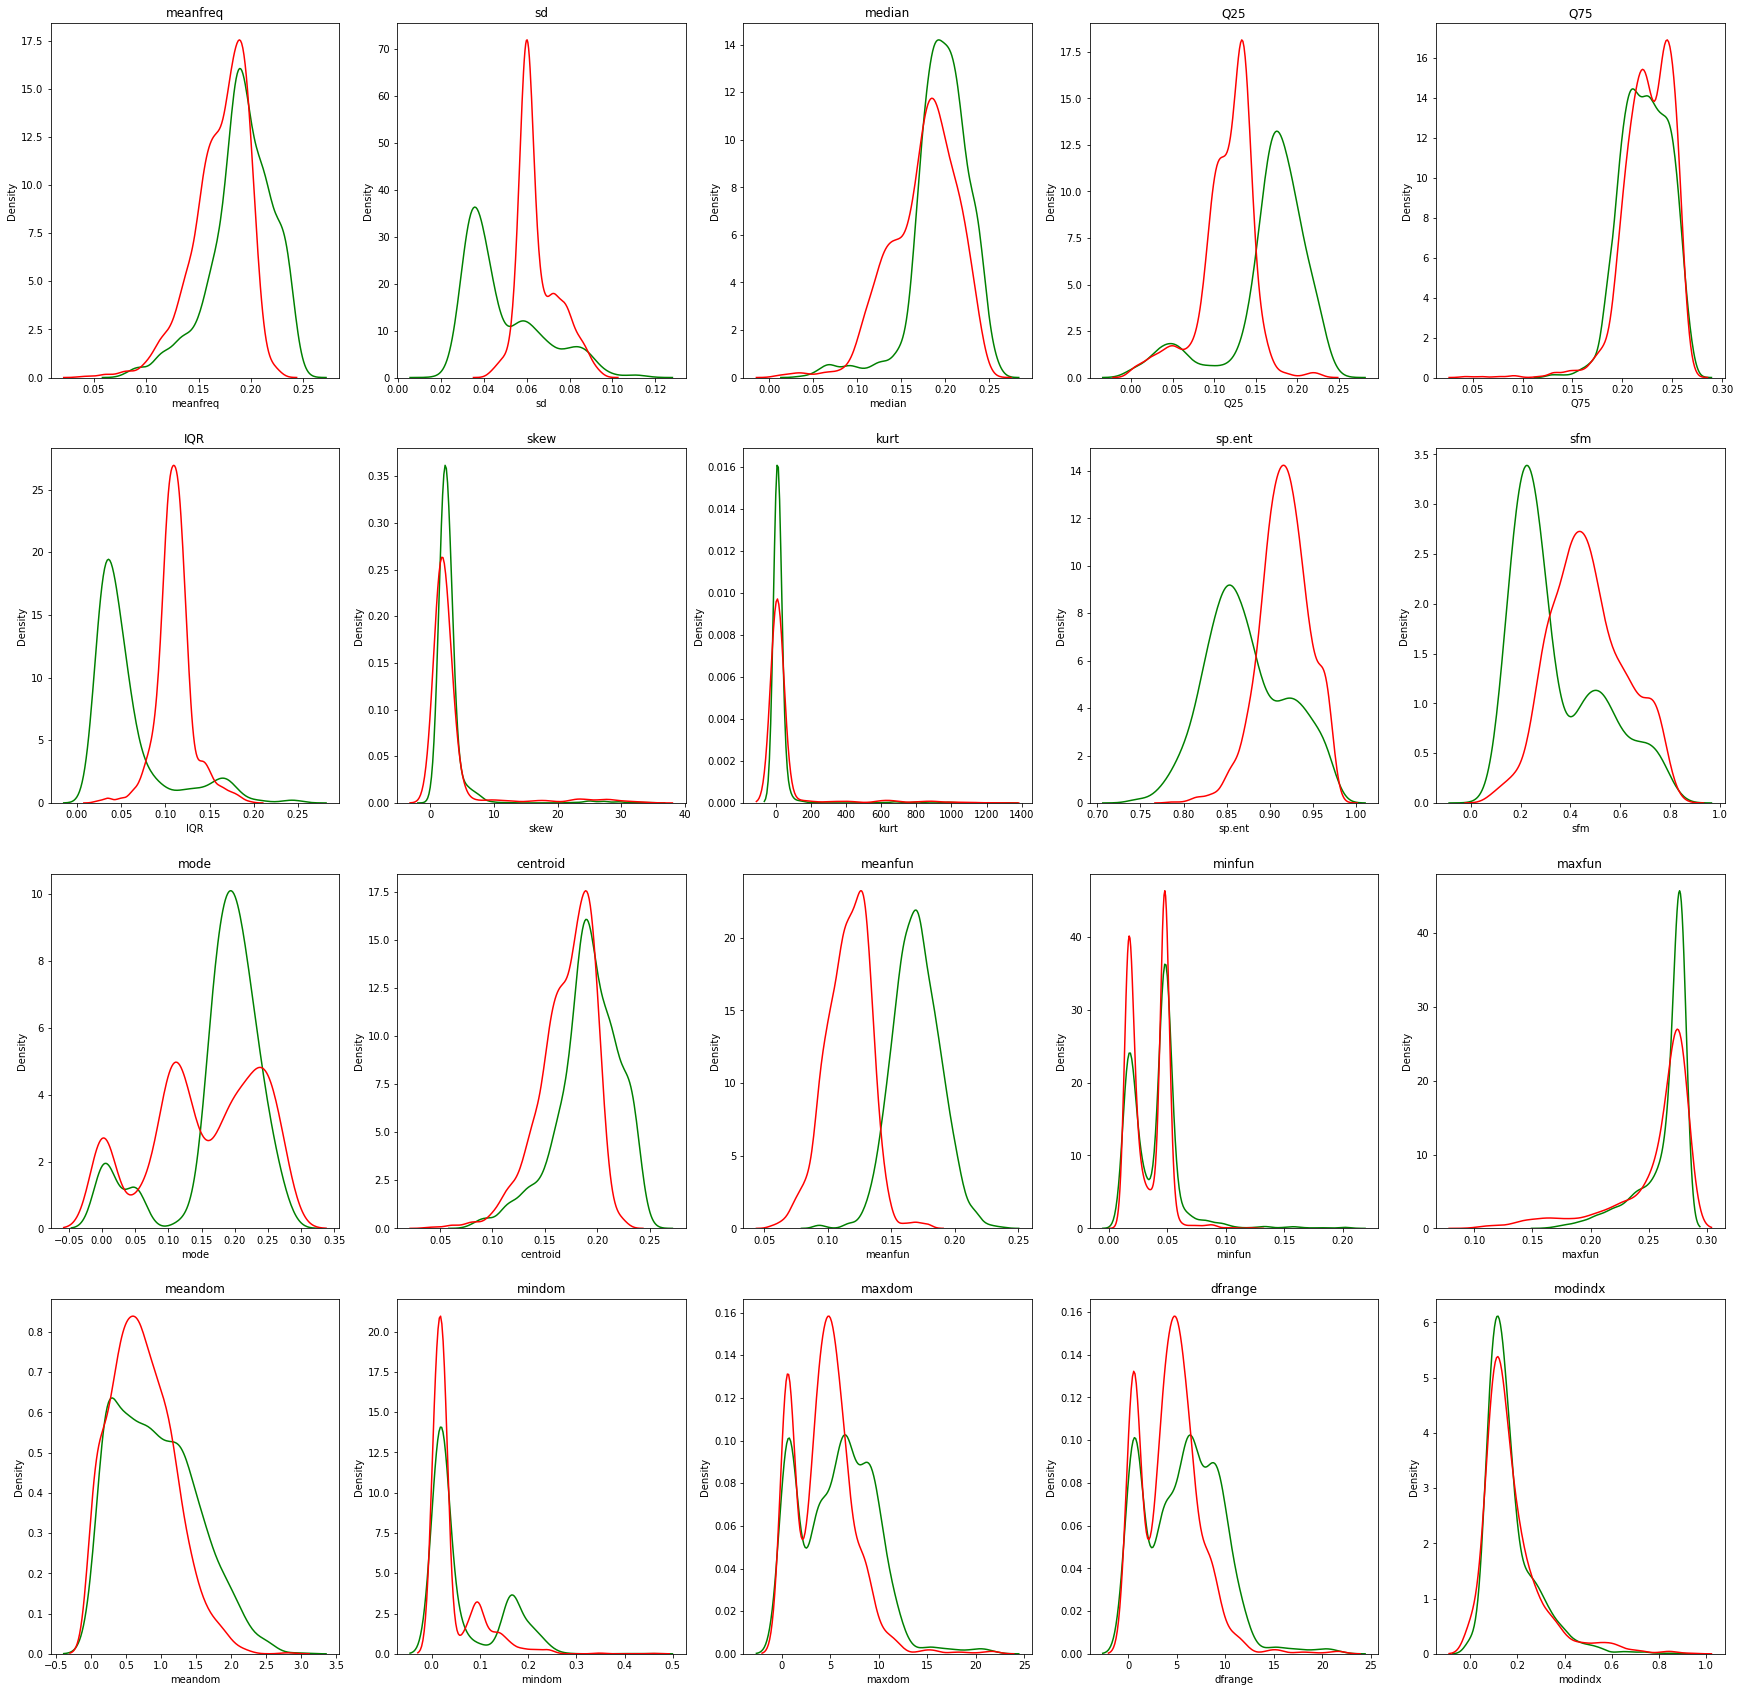

In [7]:
### representing data in continuous probability density (KERNEL DENSITY ESTIMATE PLOT)
plt.subplots(4,5,figsize=(30,30))
for i in range(1,len(voice_df.axes[1])):
    plt.subplot(4,5,i)
    plt.title(voice_df.columns[i-1])
    sns.kdeplot(voice_df.loc[voice_df['label']==0,voice_df.columns[i-1]],color='green',label='female')
    sns.kdeplot(voice_df.loc[voice_df['label']==1,voice_df.columns[i-1]],color='red',label='male')

C:\Users\EB562TS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EB562TS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EB562TS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

C:\Users\EB562TS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EB562TS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EB562TS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

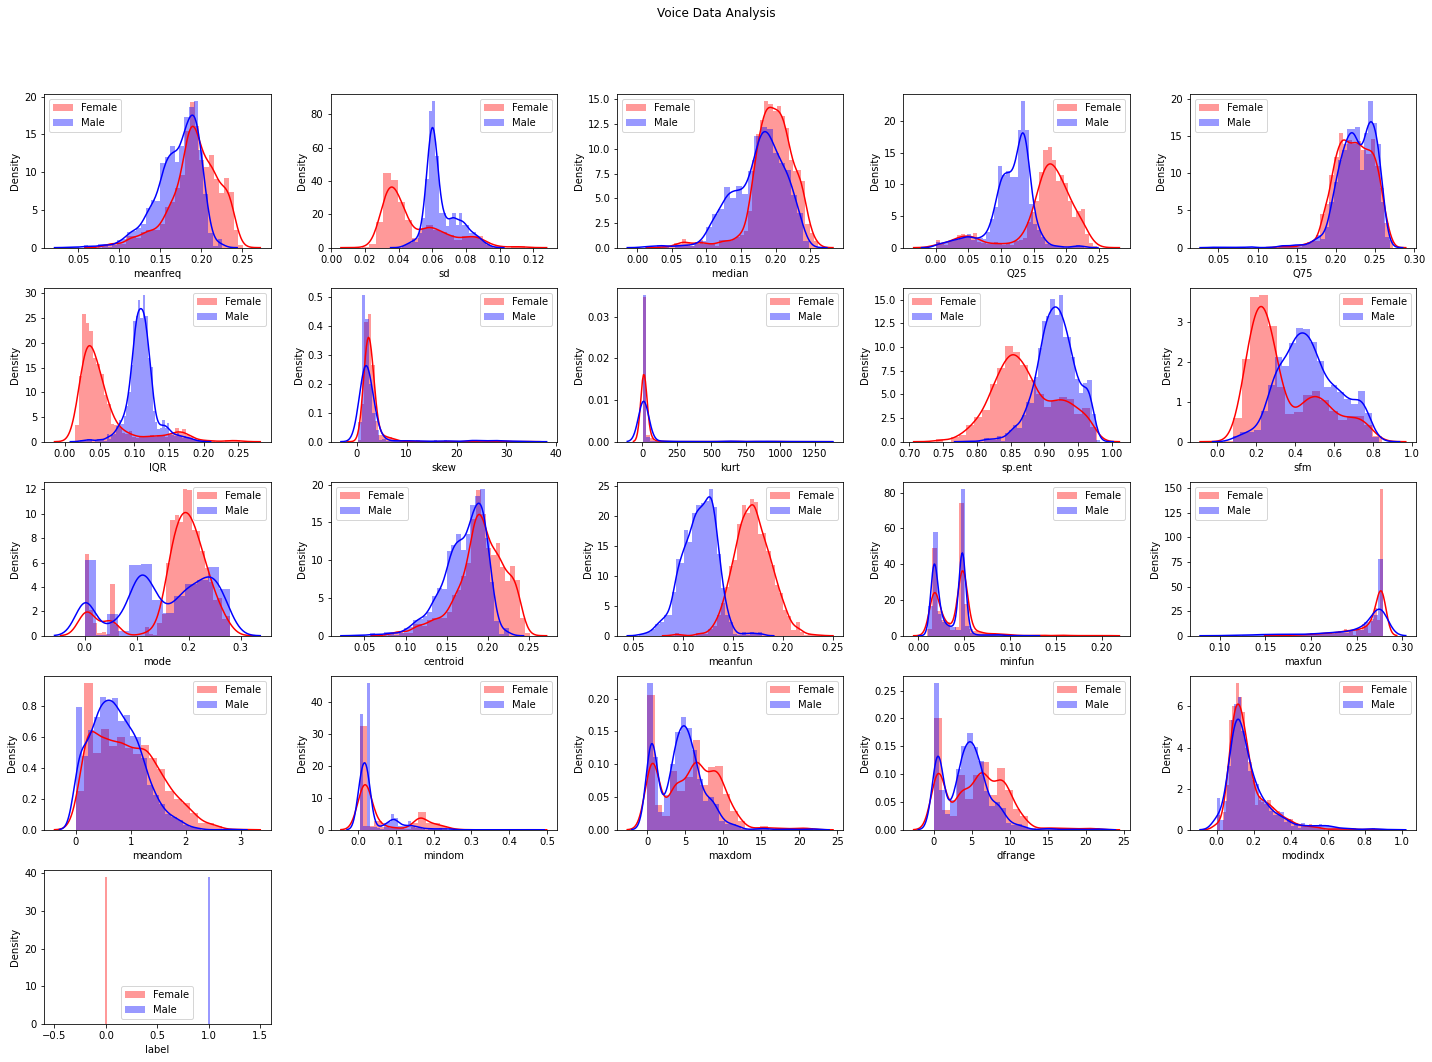

In [8]:
### distance plot
fig = plt.figure(figsize = (20, 15))
j = 0
for i in voice_df.columns:
    plt.subplot(5, 5, j+1)
    j += 1
    sns.distplot(voice_df[i][voice_df['label']==0], color='r', label = 'Female')
    sns.distplot(voice_df[i][voice_df['label']==1], color='b', label = 'Male')
    plt.legend(loc='best')
fig.suptitle('Voice Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

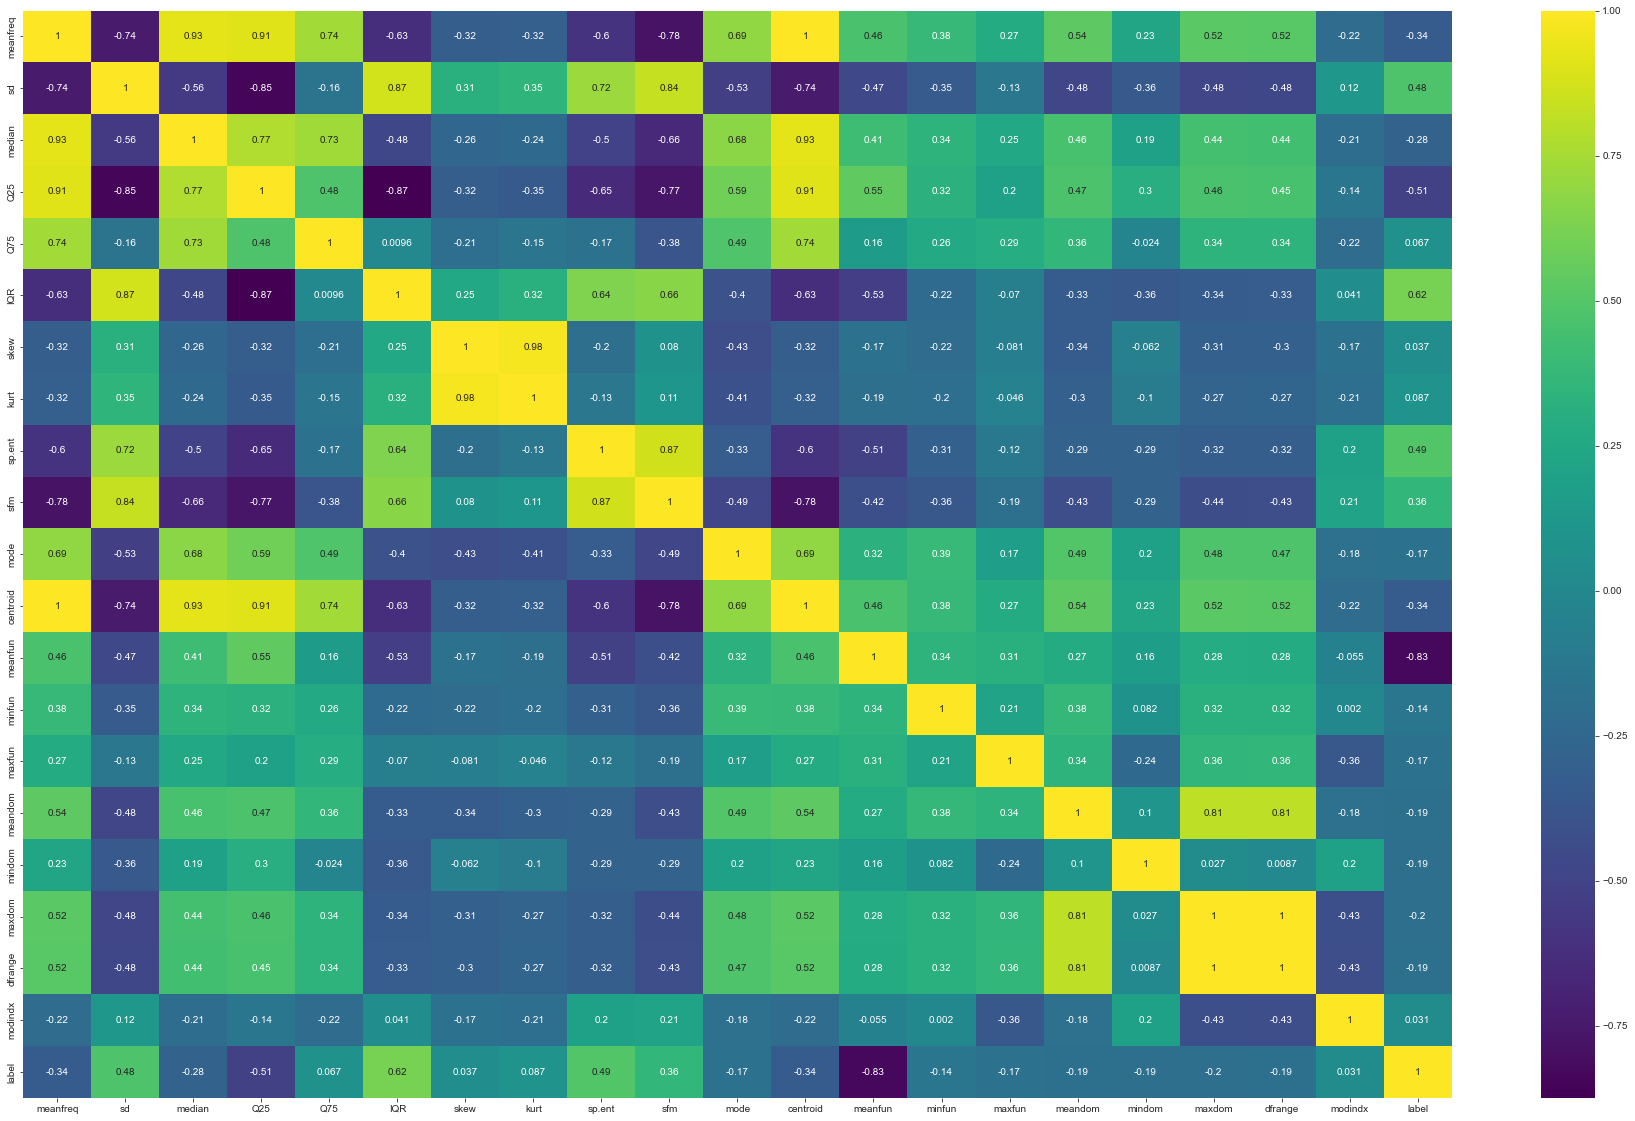

Text(0, 0.5, 'correlationa coefficient')

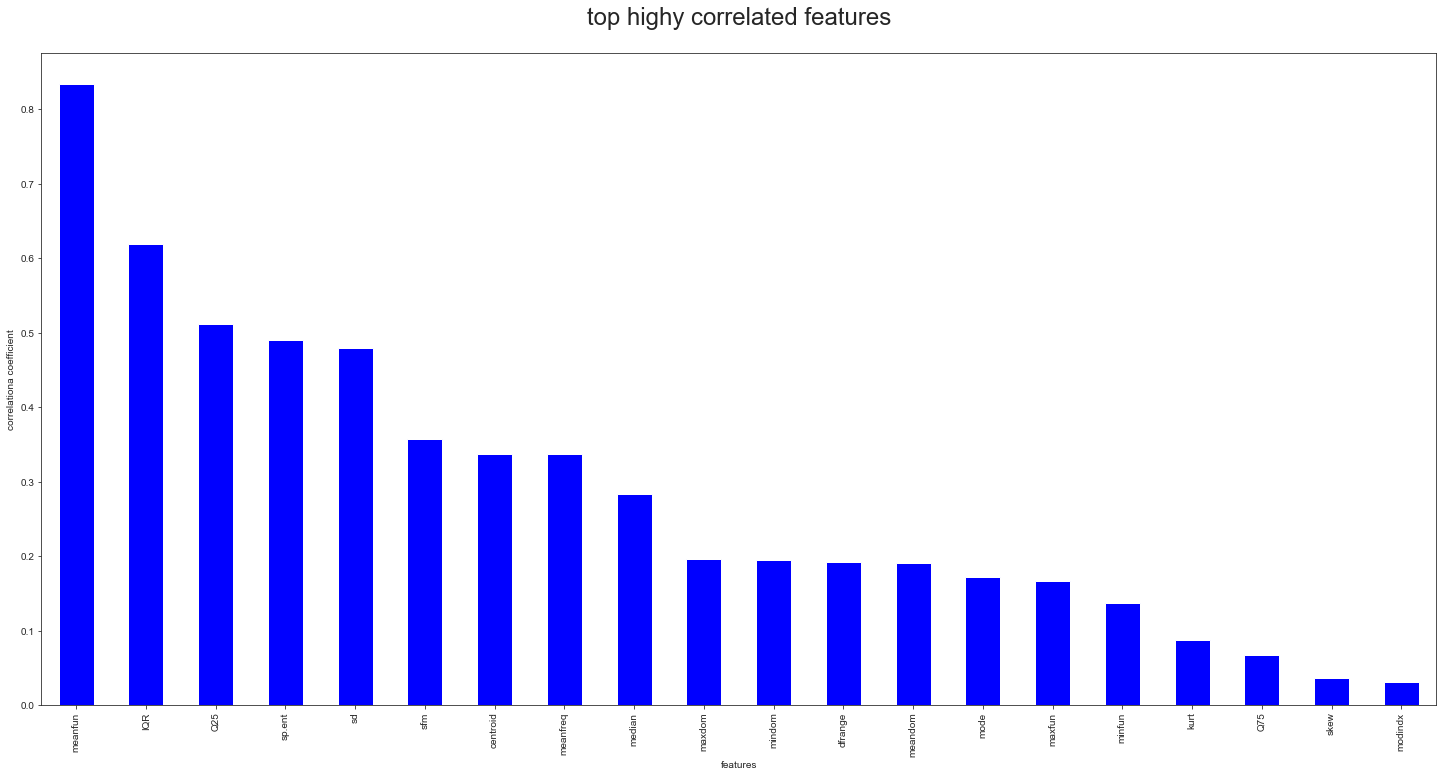

In [9]:
### correlation Matrix and heat map
corr_data=voice_df.corr()
plt.figure(figsize=(32,20))
sns.set_style('ticks')
sns.heatmap(corr_data,cmap='viridis',annot=True)
plt.show()
selected_pixel_features=corr_data['label'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:len(voice_df.axes[1])][::1]
plt.figure(figsize=(25,12))
selected_pixel_features.plot(kind='bar',color='blue')
plt.title("top highy correlated features",size=24,pad=28)
plt.xlabel("features")
plt.ylabel("correlationa coefficient")

In [10]:
### Selected features
selected_features = ['IQR','Q25','meanfun']
voice_df_x=voice_df[selected_features]
voice_df_y=voice_df.label
voice_df_y.head()

voice_df_x.head()

,IQR,Q25,meanfun
0,0.075122,0.015071,0.084279
1,0.073252,0.019414,0.107937
2,0.123207,0.008701,0.098706
3,0.111374,0.096582,0.088965
4,0.127325,0.078720,0.106398


In [11]:
trainx, testx, trainy, testy = train_test_split(voice_df_x, voice_df_y,test_size=0.3,random_state=14)
trainx.shape
trainx.head()
trainy.shape
trainy.head()
testx.shape
testx.head()
testy.shape
testy.head()

2249    0
1811    0
2073    0
996     1
132     1
Name: label, dtype: int32

In [12]:
def svm_kernel(trainx,trainy,testx,testy):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        svm_model = SVC(kernel=i).fit(trainx,trainy)
        y_pred=svm_model.predict(trainx)
        print(i,'accuracy of train data: ',accuracy_score(trainy,y_pred))
        y_pred=svm_model.predict(testx)
        print(i,'accuracy of test data: ',accuracy_score(testy,y_pred))
        rate.append(accuracy_score(testy,y_pred))
    nloc = rate.index(max(rate))
    print("highest accuracy is %s occurs at %s kernel."%(rate[nloc],kernel[nloc]))
    return kernel[nloc]

In [13]:
def  svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate=[]
    C = range(1,C)
    for i in C:
        model = SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("lowest error is %s occurs at c=%s." %(error_rate[cloc],C[cloc]))
    plt.plot(C,error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
    plt.title('erroe rate vs c value')
    plt.xlabel('c')
    plt.ylabel('error rate')
    plt.show()
    return C[cloc]

In [14]:
k=svm_kernel(trainx,trainy,testx,testy)

rbf accuracy of train data:  0.970681100586378
rbf accuracy of test data:  0.9737118822292324
poly accuracy of train data:  0.9697789806044204
poly accuracy of test data:  0.9716088328075709
linear accuracy of train data:  0.914298601714028
linear accuracy of test data:  0.9221871713985279
highest accuracy is 0.9737118822292324 occurs at rbf kernel.


lowest error is 0.023133543638275498 occurs at c=9.


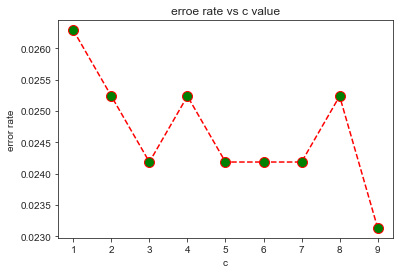

In [15]:
c=svm_error(k,10,trainx,trainy,testx,testy)

In [16]:
 ### applying Dimensionality reduction
pca_method=PCA(n_components = 2)
traindf=pca_method.fit_transform(trainx)
testdf=pca_method.transform(testx)

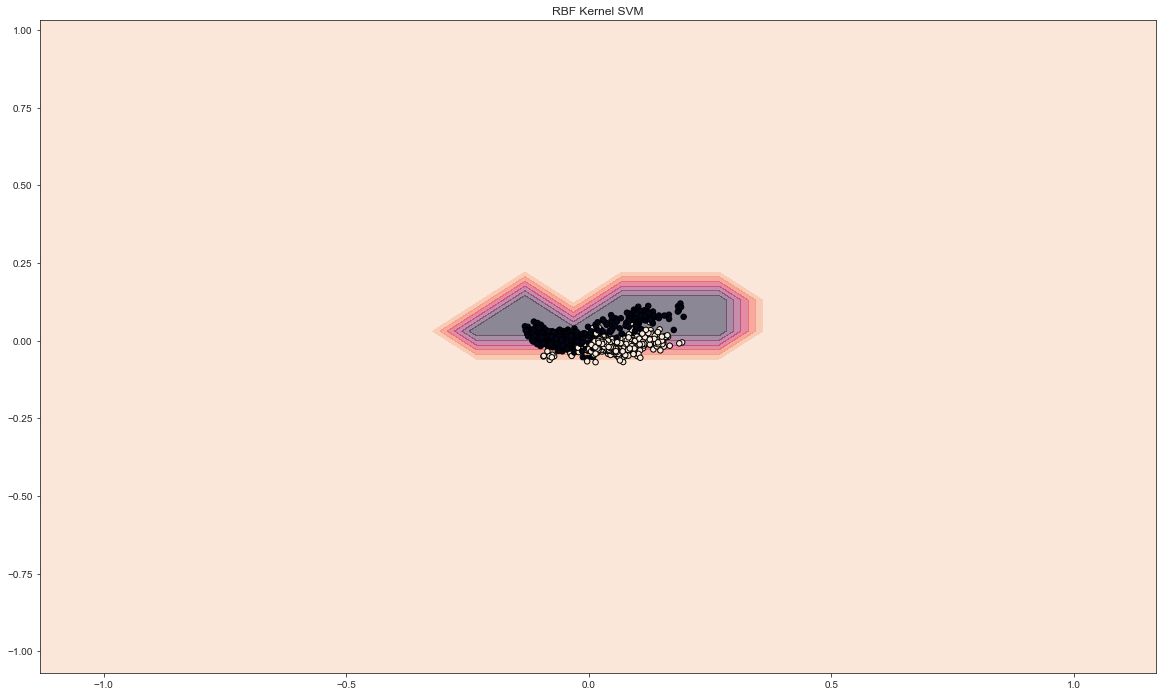

In [17]:
### VISUALIZATION
# Plotting decision regions
x_min, x_max = traindf[:, 0].min() - 1, traindf[:, 0].max() + 1
y_min, y_max = traindf[:, 1].min() - 1, traindf[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(figsize=(20, 12))

SVM_Model = SVC(kernel=k, C=c).fit(traindf,trainy)

for clf, tt in zip([SVM_Model],['RBF Kernel SVM']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5)
    ax.scatter(traindf[:, 0], traindf[:, 1], c=trainy, s=30, edgecolor='k')
    ax.set_title(tt)
plt.show()

In [18]:
### creating final SVM classifier
# Initailizing the Final SVM Classifier
Final_SVM_Model = SVC(kernel=k, C=c)
# Train the model using the training sets
Final_SVM_Model.fit(trainx, trainy)

SVC(C=9)

In [19]:
### perform prediction on training data
Final_SVM_Model_train_predictions = Final_SVM_Model.predict(trainx)

### preforming prediction on test dataset
Final_SVM_Model_test_predictions = Final_SVM_Model.predict(testx)

In [20]:
### evaluation on training dataset
print("SVM Model Confusion Matrix:")
print(confusion_matrix(trainy, Final_SVM_Model_train_predictions))

print("SVM Model Classification Report")
print(classification_report(trainy, Final_SVM_Model_train_predictions))

### evaluation on test dataset
print("SVM Model Confusion Matrix:")
print(confusion_matrix(testy, Final_SVM_Model_test_predictions))

print("SVM Model Classification Report")
print(classification_report(testy, Final_SVM_Model_test_predictions))

SVM Model Confusion Matrix:
[[1106   25]
 [  32 1054]]
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1131
           1       0.98      0.97      0.97      1086

    accuracy                           0.97      2217
   macro avg       0.97      0.97      0.97      2217
weighted avg       0.97      0.97      0.97      2217

SVM Model Confusion Matrix:
[[440  13]
 [  9 489]]
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       453
           1       0.97      0.98      0.98       498

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



In [21]:
### pridiction on test data
OutputDF = pd.DataFrame({'Actual_label':testy,'Predicted_label':Final_SVM_Model_test_predictions})
#Save to csv
OutputDF.to_csv('Gender_prediction.csv',index=False)
OutputDF.head()

,Actual_label,Predicted_label
2249,0,1
1811,0,0
2073,0,0
996,1,1
132,1,1
